# Setup

### Importing the libraries

In [1]:
# Importing the Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Loading the data

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submit_df = pd.read_csv('submit.csv')

### Visualizing few rows of the data

In [3]:
train_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
test_df.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [5]:
submit_df.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1


In [6]:
# joining the test data
final_test_df = test_df.join(submit_df, rsuffix='_2')
final_test_df.drop(['id','id_2','title'],axis=1, inplace=True)
final_test_df = final_test_df.dropna()
# final_test_df['author'] = pd.Categorical(final_test_df['author'])
# final_test_df['author'] = final_test_df['author'].cat.codes
final_test_df.head()

,author,text,label
0,David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
2,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
3,Daniel Victor,"If at first you don’t succeed, try a different...",1
4,Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1
6,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori...",1


# Exploratory Data Analysis

### Checking the Label Distrbution 

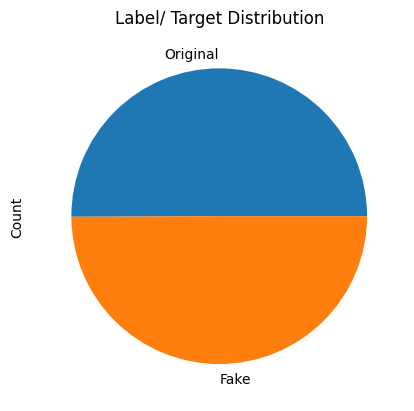

In [7]:
label_dist = train_df.label.value_counts()
labels = ['Original', 'Fake']
plt.pie(x=label_dist.values,labels=labels)
plt.ylabel('Count')
plt.title('Label/ Target Distribution')
plt.show()

As it is visible from the Pie Chart that there is no imbalance in the label's/ target class so we dont have to worry about the imbalance affecting out machine learning models

### Checking for the most frequest Occuring words

In [8]:
# if word_cloud is not installed uncomment the below line and run
# !pip install wordcloud

In [9]:
# Importing the Libraries
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Defining a Function to plot the Word Cloud for top 50 words
def plot_word_cloud(df, name):
    # Intailizing the Count Vectorizer and Fitting the data
    text = CountVectorizer(stop_words='english').fit(df['text'].tolist()) 
    # Getting the bag of words 
    bag_of_words = text.transform(df['text'].tolist())
    # Summing the bag of words
    sum_words = bag_of_words.sum(axis=0)
    # Getting the word frequency from bag of words
    words_freq = [(word, sum_words[0, idx]) for word, idx in text.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    words_freq = words_freq[:50]
    top_words = []
    for idx, i in enumerate(words_freq):
        top_words.append(i[0])
    
    # Joining the top words for word cloud
    text = " ".join(i for i in top_words)
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
    
    # Plotting the word cloud
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.title(f'{name}')
    plt.axis("off")
    plt.show()

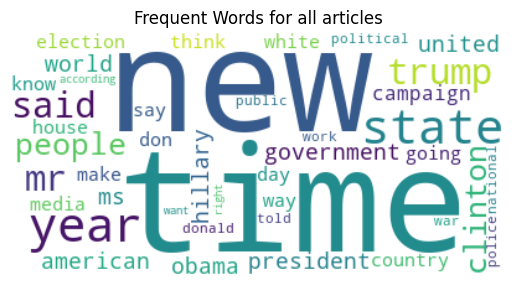

In [11]:
# Checking for the most frequest Occuring words in all articles
all_df = train_df.dropna()
plot_word_cloud(all_df, 'Frequent Words for all articles')


### Comparing the Frequently occuring words in Fake and Original Articles

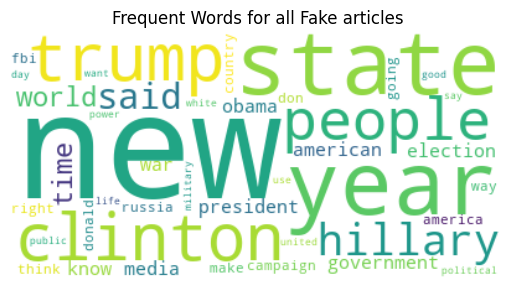

In [12]:
# Checking for the most frequest Occuring words in all fake articles
fake_df = train_df.dropna()
fake_df = fake_df[fake_df.label == 1]
plot_word_cloud(fake_df, 'Frequent Words for all Fake articles')


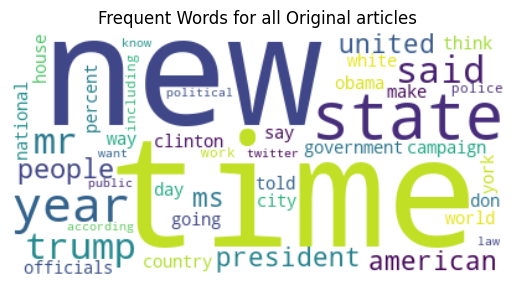

In [13]:
# Checking for the most frequest Occuring words in all Original articles
true_df = train_df.dropna()
true_df = true_df[true_df.label == 0]
plot_word_cloud(true_df, 'Frequent Words for all Original articles')


C:\Users\Pranav S\AppData\Local\Temp\ipykernel_21656\1766287856.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['author'] = pd.Categorical(temp_df['author'])
C:\Users\Pranav S\AppData\Local\Temp\ipykernel_21656\1766287856.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['author'] = temp_df['author'].cat.codes


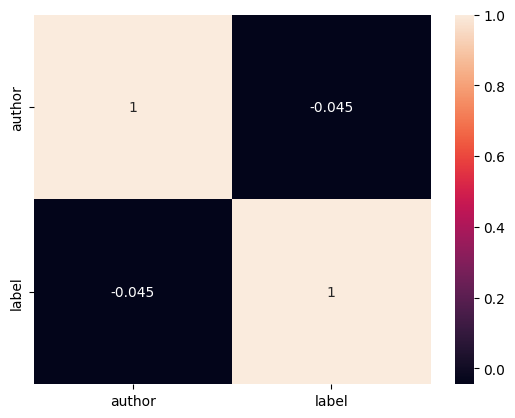

In [8]:
temp_df = train_df[['author', 'label']]

# Convert 'author' column to categorical data type
temp_df['author'] = pd.Categorical(temp_df['author'])

# Convert 'author' column to numerical data
temp_df['author'] = temp_df['author'].cat.codes


corr = temp_df.corr()

import seaborn as sns

sns.heatmap(corr, annot=True)
plt.show()

# Machine Learning Model

### Importing the libraries

In [9]:
# Importing the libraries
from sklearn.model_selection import train_test_split

# Importing the ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Importing the text processing libraries
from sklearn.feature_extraction.text import CountVectorizer

# Importing the Metrics libraries
from sklearn.metrics import accuracy_score,f1_score,classification_report

# Import joblib to export and load models
import joblib

# Igonring the warinings
import warnings
warnings.simplefilter("ignore")

### Preprocessing the data

In [11]:
# For handling sparse matrix
from scipy.sparse import csr_matrix, hstack

# Preprocessing the data
vectorized = CountVectorizer(strip_accents='ascii',stop_words='english')

train_df = train_df.dropna()
vector = vectorized.fit_transform(train_df['text'])

# Adding the author information into the data
# temp_df = train_df[['author', 'label']]
# # Convert 'author' column to categorical data type
# temp_df['author'] = pd.Categorical(temp_df['author'])
# # Convert 'author' column to numerical data
# temp_df['author'] = temp_df['author'].cat.codes
# # print(vector.shape)
# vector = hstack([vector, csr_matrix(temp_df['author'].values.reshape(-1, 1))])

X_train, X_test, y_train, y_test = train_test_split(vector, train_df.label, test_size=0.2)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Exporting the vectorizer so that it can be used in the app
# Save the trained CountVectorizer object to disk
joblib.dump(vectorized, 'vectorizer.pkl')

X_train shape: (14628, 155411)
X_test shape: (3657, 155411)
y_train shape: (14628,)
y_test shape: (3657,)


['vectorizer.pkl']

### Logistic Regression Model

In [12]:
# Load the saved CountVectorizer object from disk
vectorized = joblib.load('vectorizer.pkl')

In [14]:
log_reg = LogisticRegression(C=1e-5,max_iter=5000,random_state=42)
log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

print("Training")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}   F1 Score: {f1_score(y_train, y_train_pred)}")
print("Classsification report")
print(classification_report(y_train, y_train_pred))
print("Testing")
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred)}   F1 Score: {f1_score(y_test, y_test_pred)}")
print("Classsification report")
print(classification_report(y_test, y_test_pred))

# Saving the model
joblib.dump(log_reg, 'LogisticRegression.pkl')

Training
Accuracy: 0.8549357396773312   F1 Score: 0.8406906906906907
Classsification report
              precision    recall  f1-score   support

           0       0.90      0.83      0.87      8280
           1       0.80      0.88      0.84      6348

    accuracy                           0.85     14628
   macro avg       0.85      0.86      0.85     14628
weighted avg       0.86      0.85      0.86     14628

Testing
Testing Accuracy: 0.8471424665025977   F1 Score: 0.8321825277694387
Classsification report
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      2081
           1       0.79      0.88      0.83      1576

    accuracy                           0.85      3657
   macro avg       0.84      0.85      0.85      3657
weighted avg       0.85      0.85      0.85      3657



['LogisticRegression.pkl']

In [15]:
# Preprocess the new data
vector_test = vectorized.transform(final_test_df['text'])

In [16]:
# Logistic Regression Model
log_pred = log_reg.predict(vector_test)

print("Logistic Regression Model")
print(f"Accuracy: {accuracy_score(final_test_df['label'], log_pred)}   F1 Score: {f1_score(final_test_df['label'], log_pred)}")
print("Classsification report")
print(classification_report(final_test_df['label'], log_pred))

Logistic Regression Model
Accuracy: 0.680221417926336   F1 Score: 0.687213660974594
Classsification report
              precision    recall  f1-score   support

           0       0.65      0.70      0.67      2218
           1       0.71      0.67      0.69      2479

    accuracy                           0.68      4697
   macro avg       0.68      0.68      0.68      4697
weighted avg       0.68      0.68      0.68      4697



### Random Forest Classifier

In [17]:
rfc = RandomForestClassifier(n_estimators=200,max_depth=25,random_state=42)
rfc.fit(X_train, y_train)

y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

print("Training")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}   F1 Score: {f1_score(y_train, y_train_pred)}")
print("Classsification report")
print(classification_report(y_train, y_train_pred))
print("Testing")
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred)}   F1 Score: {f1_score(y_test, y_test_pred)}")
print("Classsification report")
print(classification_report(y_test, y_test_pred))
# Saving the model
joblib.dump(rfc, 'RandomForestClassifier.pkl')

Training
Accuracy: 0.9811320754716981   F1 Score: 0.9782677165354331
Classsification report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8280
           1       0.98      0.98      0.98      6348

    accuracy                           0.98     14628
   macro avg       0.98      0.98      0.98     14628
weighted avg       0.98      0.98      0.98     14628

Testing
Testing Accuracy: 0.9004648619086683   F1 Score: 0.8737864077669902
Classsification report
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2081
           1       0.96      0.80      0.87      1576

    accuracy                           0.90      3657
   macro avg       0.91      0.89      0.90      3657
weighted avg       0.91      0.90      0.90      3657



['RandomForestClassifier.pkl']

In [18]:
# Preprocess the new data
# vector_test = vectorized.transform(final_test_df['text'])
# Random Forest Classifier
rfc_pred = rfc.predict(vector_test)

print("Random Forest Classifier")
print(f"Accuracy: {accuracy_score(final_test_df['label'], rfc_pred)}   F1 Score: {f1_score(final_test_df['label'], rfc_pred)}")
print("Classsification report")
print(classification_report(final_test_df['label'], rfc_pred))

Random Forest Classifier
Accuracy: 0.6410474771130509   F1 Score: 0.6032941176470589
Classsification report
              precision    recall  f1-score   support

           0       0.59      0.78      0.67      2218
           1       0.72      0.52      0.60      2479

    accuracy                           0.64      4697
   macro avg       0.66      0.65      0.64      4697
weighted avg       0.66      0.64      0.64      4697



### Gaussian NB

Gaussian Navie Bayes Cannot handle such a large data so we are ony selection the top 10,000 words from the array.

In [19]:
# Preprocessing the data
vectorized_NB = CountVectorizer(strip_accents='ascii',stop_words='english', max_features=20000)

train_df_NB = train_df.dropna()
vector_NB = vectorized_NB.fit_transform(train_df_NB['text'])

X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(vector_NB, train_df_NB.label, test_size=0.2)

print(f"X_train shape: {X_train_NB.shape}")
print(f"X_test shape: {X_test_NB.shape}")
print(f"y_train shape: {y_train_NB.shape}")
print(f"y_test shape: {y_test_NB.shape}")
# Saving the CountVectorizer
joblib.dump(vectorized_NB, 'vectorized_NB.pkl')

X_train shape: (14628, 20000)
X_test shape: (3657, 20000)
y_train shape: (14628,)
y_test shape: (3657,)


['vectorized_NB.pkl']

In [20]:
gnb = GaussianNB(var_smoothing=1e-9)
gnb.fit(X_train_NB.toarray(), y_train_NB)

y_train_pred = gnb.predict(X_train_NB.toarray())
y_test_pred = gnb.predict(X_test_NB.toarray())

print("Training")
print(f"Accuracy: {accuracy_score(y_train_NB, y_train_pred)}   F1 Score: {f1_score(y_train_NB, y_train_pred)}")
print("Classsification report")
print(classification_report(y_train_NB, y_train_pred))
print("Testing")
print(f"Testing Accuracy: {accuracy_score(y_test_NB, y_test_pred)}   F1 Score: {f1_score(y_test_NB, y_test_pred)}")
print("Classsification report")
print(classification_report(y_test_NB, y_test_pred))
# Saving the GaussianNB Model
joblib.dump(gnb, 'GaussianNB.pkl')


Training
Accuracy: 0.939226141646158   F1 Score: 0.9332532472407838
Classsification report
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      8283
           1       0.89      0.98      0.93      6345

    accuracy                           0.94     14628
   macro avg       0.94      0.94      0.94     14628
weighted avg       0.94      0.94      0.94     14628

Testing
Testing Accuracy: 0.8854252119223407   F1 Score: 0.8722171393717597
Classsification report
              precision    recall  f1-score   support

           0       0.92      0.87      0.90      2078
           1       0.84      0.91      0.87      1579

    accuracy                           0.89      3657
   macro avg       0.88      0.89      0.88      3657
weighted avg       0.89      0.89      0.89      3657



['GaussianNB.pkl']

In [21]:
vector_2 = vectorized_NB.transform(final_test_df['text'])

In [22]:
# Guassian Navie Bayes
gnb_pred = gnb.predict(vector_2.toarray())

print("Guassian Navie Bayes")
print(f"Accuracy: {accuracy_score(final_test_df['label'], gnb_pred)}   F1 Score: {f1_score(final_test_df['label'], gnb_pred)}")
print("Classsification report")
print(classification_report(final_test_df['label'], gnb_pred))

Guassian Navie Bayes
Accuracy: 0.6427506919310197   F1 Score: 0.6441899915182357
Classsification report
              precision    recall  f1-score   support

           0       0.61      0.68      0.64      2218
           1       0.68      0.61      0.64      2479

    accuracy                           0.64      4697
   macro avg       0.64      0.64      0.64      4697
weighted avg       0.65      0.64      0.64      4697



### Compare the Model on New data

In [23]:
# Preprocess the new data
# vectorized = CountVectorizer(strip_accents='ascii',stop_words='english')

vector = vectorized.transform(final_test_df['text'])

vector_2 = vectorized_NB.transform(final_test_df['text'])

In [24]:
# Logistic Regression Model
log_pred = log_reg.predict(vector)

# Random Forest Classifier
rfc_pred = rfc.predict(vector)

# Guassian Navie Bayes
gnb_pred = gnb.predict(vector_2.toarray())

print("Logistic Regression Model")
print(f"Accuracy: {accuracy_score(final_test_df['label'], log_pred)}   F1 Score: {f1_score(final_test_df['label'], log_pred)}")
print("Classsification report")
print(classification_report(final_test_df['label'], log_pred))
print('---')
print("Random Forest Classifier")
print(f"Accuracy: {accuracy_score(final_test_df['label'], rfc_pred)}   F1 Score: {f1_score(final_test_df['label'], rfc_pred)}")
print("Classsification report")
print(classification_report(final_test_df['label'], rfc_pred))
print('---')
print("Guassian Navie Bayes")
print(f"Accuracy: {accuracy_score(final_test_df['label'], gnb_pred)}   F1 Score: {f1_score(final_test_df['label'], gnb_pred)}")
print("Classsification report")
print(classification_report(final_test_df['label'], gnb_pred))

Logistic Regression Model
Accuracy: 0.680221417926336   F1 Score: 0.687213660974594
Classsification report
              precision    recall  f1-score   support

           0       0.65      0.70      0.67      2218
           1       0.71      0.67      0.69      2479

    accuracy                           0.68      4697
   macro avg       0.68      0.68      0.68      4697
weighted avg       0.68      0.68      0.68      4697

---
Random Forest Classifier
Accuracy: 0.6410474771130509   F1 Score: 0.6032941176470589
Classsification report
              precision    recall  f1-score   support

           0       0.59      0.78      0.67      2218
           1       0.72      0.52      0.60      2479

    accuracy                           0.64      4697
   macro avg       0.66      0.65      0.64      4697
weighted avg       0.66      0.64      0.64      4697

---
Guassian Navie Bayes
Accuracy: 0.6427506919310197   F1 Score: 0.6441899915182357
Classsification report
              preci

### Other Models that are not mentioned in Proposal

In [25]:
from sklearn.svm import SVC

svc = SVC(C=1e-2,random_state=42)
svc.fit(X_train, y_train)

y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

print("Training")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}   F1 Score: {f1_score(y_train, y_train_pred)}")
print("Classsification report")
print(classification_report(y_train, y_train_pred))
print("Testing")
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred)}   F1 Score: {f1_score(y_test, y_test_pred)}")
print("Classsification report")
print(classification_report(y_test, y_test_pred))


Training
Accuracy: 0.6950369155045119   F1 Score: 0.6645107919079493
Classsification report
              precision    recall  f1-score   support

           0       0.75      0.69      0.72      8280
           1       0.64      0.70      0.66      6348

    accuracy                           0.70     14628
   macro avg       0.69      0.70      0.69     14628
weighted avg       0.70      0.70      0.70     14628

Testing
Testing Accuracy: 0.6959256220946131   F1 Score: 0.6674641148325359
Classsification report
              precision    recall  f1-score   support

           0       0.76      0.69      0.72      2081
           1       0.63      0.71      0.67      1576

    accuracy                           0.70      3657
   macro avg       0.69      0.70      0.69      3657
weighted avg       0.70      0.70      0.70      3657



In [26]:
# Support Vector Classifier Model
svg_pred = svc.predict(vector_test)

print("Support Vector Classifier Model")
print(f"Accuracy: {accuracy_score(final_test_df['label'], svg_pred)}   F1 Score: {f1_score(final_test_df['label'], svg_pred)}")
print("Classsification report")
print(classification_report(final_test_df['label'], svg_pred))


Support Vector Classifier Model
Accuracy: 0.8763040238450075   F1 Score: 0.8778642001261299
Classsification report
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      2218
           1       0.92      0.84      0.88      2479

    accuracy                           0.88      4697
   macro avg       0.88      0.88      0.88      4697
weighted avg       0.88      0.88      0.88      4697



In [ ]:
# Saving the SVC Model
joblib.dump(svc, 'SVC.pkl')

# Hyperparameter Tuning of all the models

In [1]:
# Importing the required libraries
from sklearn.model_selection import GridSearchCV

### Logistic Regression

In [29]:
# Define the parameter grid to search
param_grid = {'penalty': ['l1', 'l2'],
              'C': [1e-7, 0.001, 0.01, 0.1, 1, 10, 100]}

# Create a logistic regression object
logistic = LogisticRegression()

# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(logistic, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.1, 'penalty': 'l2'}
Best cross-validation score: 0.95


In [30]:
# Best Model
best_logistic = grid_search.best_estimator_

print(f"Accuracy on test data: {best_logistic.score(vector_test, final_test_df['label'])}")

Accuracy on test data: 0.6395147313691508


### Random Forest Classifier

In [ ]:
# Define the parameter grid to search
param_grid = {'n_estimators': [100, 300],
              'max_depth': [None, 10, 15],
              'max_features': ['sqrt', 'log2']}

# Create a random forest object
rfc = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Best Model
best_rfc = grid_search.best_estimator_

print(f"Accuracy on test data: {best_rfc.score(vector_test, final_test_df['label'])}")

### Gaussian NB

In [ ]:
# Define the parameter grid to search
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Create a Gaussian Naive Bayes object
gnb = GaussianNB()

# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(gnb, param_grid, cv=5)
grid_search.fit(X_train_NB.toarray(), y_train)

# Print the best parameters and score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


In [37]:
# Best Model
best_gnb = grid_search.best_estimator_

print(f"Accuracy on test data: {best_gnb.score(vector_2.toarray(), final_test_df['label'])}")

Accuracy on test data: 0.6547275178124399


# Conclusion

When Comparing the models, Logistics regression model performed the best when it comes to the test dataset which achives an F1 score of 70%, The next best model, model is Gaussion NB which achieves a model test F1 score of 66%.

# Notes

On a side note even though Hyper parameters have been tuned using Grid Search, it only optimizes the model for Training set, and it causes a huge overfit as a result. So it performs poorly on the test data. So models saved have been optimized so that model is not overfitting and give some what better result than the GridSearchCV optimized models.